In [2]:
# audio libraries
import librosa
import librosa.display as lplt
import IPython

# import matplotlib to be able to display graphs
import matplotlib.pyplot as plt

# transform .wav into .csv
import csv
import os
import numpy as np
import pandas as pd

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# model
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential

#dataset download
import opendatasets as od

import kaggle

import h5py

In [3]:
from pydub import AudioSegment

!pip install librosa

!pip install opendatasets

kaggle datasets download -d shreyj1729/best-of-watkins-marine-mammal-sound-database


https://www.kaggle.com/datasets/shreyj1729/best-of-watkins-marine-mammal-sound-database

https://www.kaggle.com/datasets/shreyj1729/best-of-watkins-marine-mammal-sound-database/download?datasetVersionNumber=3

In [ ]:
#kaggle.api.authenticate()
#kaggle.api.dataset_download_files('shreyj1729/best-of-watkins-marine-mammal-sound-database',path='C:\\Users\\puter\\Desktop\\msds434_project',unzip=True)

In [4]:
cwd = os.getcwd()
print(cwd)

C:\Users\puter\Desktop\msds434_project


In [5]:
datadir = cwd+'\\data'
print(datadir)

C:\Users\puter\Desktop\msds434_project\data


In [6]:
print([name for name in os.listdir(datadir) if os.path.isdir(os.path.join(datadir,name))])

['AtlanticSpottedDolphin', 'BeardedSeal', 'Beluga_WhiteWhale', 'BlueWhale', 'BottlenoseDolphin', 'Boutu_AmazonRiverDolphin', 'BowheadWhale', 'ClymeneDolphin', "Commerson'sDolphin", 'CommonDolphin', "Dall'sPorpoise", 'DuskyDolphin', 'FalseKillerWhale', 'FinlessPorpoise', 'Fin_FinbackWhale', "Fraser'sDolphin", "Grampus_Risso'sDolphin", 'GraySeal', 'GrayWhale', 'HarborPorpoise', 'HarbourSeal', 'HarpSeal', "Heaviside'sDolphin", 'HoodedSeal', 'HumpbackWhale', 'IrawaddyDolphin', 'JuanFernandezFurSeal', 'KillerWhale', 'LeopardSeal', 'LongBeaked(Pacific)CommonDolphin', 'Long_FinnedPilotWhale', 'MelonHeadedWhale', 'MinkeWhale', 'Narwhal', 'NewZealandFurSeal', 'NorthernRightWhale', 'PantropicalSpottedDolphin', 'RibbonSeal', 'RingedSeal', 'RossSeal', 'Rough_ToothedDolphin', 'SeaOtter', 'Short_Finned(Pacific)PilotWhale', 'SouthernRightWhale', 'SpermWhale', 'SpinnerDolphin', 'SpottedSeal', 'StellerSeaLion', 'StripedDolphin', 'TucuxiDolphin', 'Walrus', 'WeddellSeal', 'WestIndianManatee', 'White_beak

In [7]:
print(os.listdir(datadir))

['AtlanticSpottedDolphin', 'BeardedSeal', 'Beluga_WhiteWhale', 'BlueWhale', 'BottlenoseDolphin', 'Boutu_AmazonRiverDolphin', 'BowheadWhale', 'ClymeneDolphin', "Commerson'sDolphin", 'CommonDolphin', "Dall'sPorpoise", 'DuskyDolphin', 'FalseKillerWhale', 'FinlessPorpoise', 'Fin_FinbackWhale', "Fraser'sDolphin", "Grampus_Risso'sDolphin", 'GraySeal', 'GrayWhale', 'HarborPorpoise', 'HarbourSeal', 'HarpSeal', "Heaviside'sDolphin", 'HoodedSeal', 'HumpbackWhale', 'IrawaddyDolphin', 'JuanFernandezFurSeal', 'KillerWhale', 'LeopardSeal', 'LongBeaked(Pacific)CommonDolphin', 'Long_FinnedPilotWhale', 'MelonHeadedWhale', 'MinkeWhale', 'Narwhal', 'NewZealandFurSeal', 'NorthernRightWhale', 'PantropicalSpottedDolphin', 'RibbonSeal', 'RingedSeal', 'RossSeal', 'Rough_ToothedDolphin', 'SeaOtter', 'Short_Finned(Pacific)PilotWhale', 'SouthernRightWhale', 'SpermWhale', 'SpinnerDolphin', 'SpottedSeal', 'StellerSeaLion', 'StripedDolphin', 'TucuxiDolphin', 'Walrus', 'WeddellSeal', 'WestIndianManatee', 'White_beak

In [8]:
mammal_list = os.listdir(datadir)
mammal_list

['AtlanticSpottedDolphin',
 'BeardedSeal',
 'Beluga_WhiteWhale',
 'BlueWhale',
 'BottlenoseDolphin',
 'Boutu_AmazonRiverDolphin',
 'BowheadWhale',
 'ClymeneDolphin',
 "Commerson'sDolphin",
 'CommonDolphin',
 "Dall'sPorpoise",
 'DuskyDolphin',
 'FalseKillerWhale',
 'FinlessPorpoise',
 'Fin_FinbackWhale',
 "Fraser'sDolphin",
 "Grampus_Risso'sDolphin",
 'GraySeal',
 'GrayWhale',
 'HarborPorpoise',
 'HarbourSeal',
 'HarpSeal',
 "Heaviside'sDolphin",
 'HoodedSeal',
 'HumpbackWhale',
 'IrawaddyDolphin',
 'JuanFernandezFurSeal',
 'KillerWhale',
 'LeopardSeal',
 'LongBeaked(Pacific)CommonDolphin',
 'Long_FinnedPilotWhale',
 'MelonHeadedWhale',
 'MinkeWhale',
 'Narwhal',
 'NewZealandFurSeal',
 'NorthernRightWhale',
 'PantropicalSpottedDolphin',
 'RibbonSeal',
 'RingedSeal',
 'RossSeal',
 'Rough_ToothedDolphin',
 'SeaOtter',
 'Short_Finned(Pacific)PilotWhale',
 'SouthernRightWhale',
 'SpermWhale',
 'SpinnerDolphin',
 'SpottedSeal',
 'StellerSeaLion',
 'StripedDolphin',
 'TucuxiDolphin',
 'Walrus

In [9]:
file_list = []
for path, subdirs, files in os.walk(datadir):
    for name in files:
        print(os.path.join(path,name))
        file_list.append(os.path.join(path,name))

C:\Users\puter\Desktop\msds434_project\data\AtlanticSpottedDolphin\61025001.wav
C:\Users\puter\Desktop\msds434_project\data\AtlanticSpottedDolphin\61025002.wav
C:\Users\puter\Desktop\msds434_project\data\AtlanticSpottedDolphin\61025003.wav
C:\Users\puter\Desktop\msds434_project\data\AtlanticSpottedDolphin\61025004.wav
C:\Users\puter\Desktop\msds434_project\data\AtlanticSpottedDolphin\61025005.wav
C:\Users\puter\Desktop\msds434_project\data\AtlanticSpottedDolphin\61025006.wav
C:\Users\puter\Desktop\msds434_project\data\AtlanticSpottedDolphin\61025007.wav
C:\Users\puter\Desktop\msds434_project\data\AtlanticSpottedDolphin\61025008.wav
C:\Users\puter\Desktop\msds434_project\data\AtlanticSpottedDolphin\61025009.wav
C:\Users\puter\Desktop\msds434_project\data\AtlanticSpottedDolphin\6102500A.wav
C:\Users\puter\Desktop\msds434_project\data\AtlanticSpottedDolphin\6102500B.wav
C:\Users\puter\Desktop\msds434_project\data\AtlanticSpottedDolphin\6102500C.wav
C:\Users\puter\Desktop\msds434_project\d

In [10]:
file_list

['C:\\Users\\puter\\Desktop\\msds434_project\\data\\AtlanticSpottedDolphin\\61025001.wav',
 'C:\\Users\\puter\\Desktop\\msds434_project\\data\\AtlanticSpottedDolphin\\61025002.wav',
 'C:\\Users\\puter\\Desktop\\msds434_project\\data\\AtlanticSpottedDolphin\\61025003.wav',
 'C:\\Users\\puter\\Desktop\\msds434_project\\data\\AtlanticSpottedDolphin\\61025004.wav',
 'C:\\Users\\puter\\Desktop\\msds434_project\\data\\AtlanticSpottedDolphin\\61025005.wav',
 'C:\\Users\\puter\\Desktop\\msds434_project\\data\\AtlanticSpottedDolphin\\61025006.wav',
 'C:\\Users\\puter\\Desktop\\msds434_project\\data\\AtlanticSpottedDolphin\\61025007.wav',
 'C:\\Users\\puter\\Desktop\\msds434_project\\data\\AtlanticSpottedDolphin\\61025008.wav',
 'C:\\Users\\puter\\Desktop\\msds434_project\\data\\AtlanticSpottedDolphin\\61025009.wav',
 'C:\\Users\\puter\\Desktop\\msds434_project\\data\\AtlanticSpottedDolphin\\6102500A.wav',
 'C:\\Users\\puter\\Desktop\\msds434_project\\data\\AtlanticSpottedDolphin\\6102500B.wav',

In [11]:
test_sound = file_list[0]
data, sr = librosa.load(test_sound)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


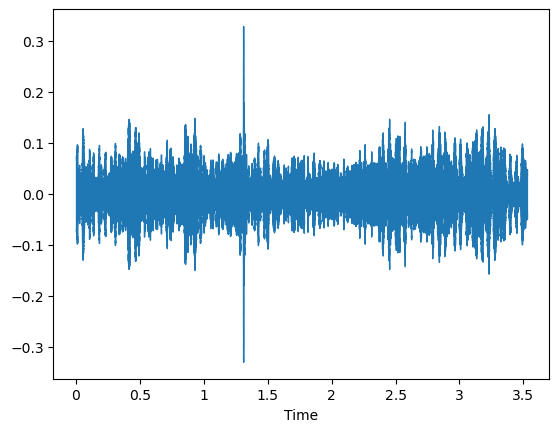

In [12]:
plt.show(librosa.display.waveshow(data))

In [ ]:
stft = librosa.stft(data)
plt.colorbar(librosa.display.specshow(stft, sr = sr, x_axis = 'time', y_axis = 'hz'))

In [ ]:
stft_db = librosa.amplitude_to_db(abs(stft))
plt.colorbar(librosa.display.specshow(stft_db, sr = sr, x_axis = 'time', y_axis = 'hz'))

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(data + 0.01, sr = sr)[0]
plt.show(librosa.display.waveshow(data, sr = sr, alpha = 0.4))

In [ ]:
chroma = librosa.feature.chroma_stft(data, sr = sr)
lplt.specshow(chroma, sr = sr, x_axis = "time" ,y_axis = "chroma", cmap = "coolwarm")
plt.colorbar()
plt.title("Chroma Features")
plt.show()

In [ ]:
start = 1000
end = 1200
plt.plot(data[start:end])
plt.grid()

In [ ]:
header = "filename length chroma_stft_mean chroma_stft_var rms_mean rms_var spectral_centroid_mean spectral_centroid_var spectral_bandwidth_mean \
        spectral_bandwidth_var rolloff_mean rolloff_var zero_crossing_rate_mean zero_crossing_rate_var harmony_mean harmony_var perceptr_mean \
        perceptr_var tempo mfcc1_mean mfcc1_var mfcc2_mean mfcc2_var mfcc3_mean mfcc3_var mfcc4_mean mfcc4_var label".split()

In [ ]:
file = open("data.csv", "w", newline = "")
with file:
    writer = csv.writer(file)
    writer.writerow(header)

for mammal in mammal_list:

    for filename in os.listdir(datadir):

        sound_name = f"/workspace/data/{animal}/{filename}"
        y, sr = librosa.load(sound_name, mono = True, duration = 30)
        chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
        rmse = librosa.feature.rms(y = y)
        spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
        spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
        rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y = y, sr = sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'

        for e in mfcc:
            to_append += f' {np.mean(e)}'

        to_append += f' {animal}'
        file = open('data.csv', 'a', newline = '')

        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [ ]:
for mammal in mammal_list:
    testdir = os.path.join(datadir,mammal)
    for soundfile in os.listdir(testdir):
        sound = os.path.join(testdir,soundfile)
        #print(sound)
        y, sr = librosa.load(sound, mono = True, duration = 30)
        chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
        rmse = librosa.feature.rms(y = y)
        spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
        spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
        rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y = y, sr = sr)
        to_append = f'{soundfile} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'

        for e in mfcc:
            to_append += f' {np.mean(e)}'

        to_append += f' {mammal}'
        file = open('data.csv', 'a', newline = '')

        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [13]:
df = pd.read_csv('data.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,label
0,61025001.wav,0.706098,0.043396,2635.072538,2803.985369,5988.922119,0.063486,-270.241791,48.500534,3.502010,...,12.494084,2.726865,11.101119,1.160558,13.390925,-1.540805,11.640878,-0.645034,9.255059,AtlanticSpottedDolphin
1,61025002.wav,0.725336,0.035210,3313.913240,3263.940882,7516.575382,0.074055,-267.910065,45.683434,21.619375,...,15.263996,3.299997,10.994728,-1.869271,12.722449,-0.317514,12.850360,-1.479114,13.217042,AtlanticSpottedDolphin
2,61025003.wav,0.712042,0.063869,2796.731828,3023.156555,6327.857570,0.080576,-273.549866,49.181992,26.617874,...,13.080658,3.502242,10.734021,-0.395964,12.181943,-0.427907,12.781898,0.306748,11.590680,AtlanticSpottedDolphin
3,61025004.wav,0.559628,0.033721,3570.026148,2716.105736,6692.292866,0.172196,-242.003540,20.642986,1.941089,...,14.298363,-1.756345,11.344100,2.861473,10.103499,-1.272834,11.733179,-3.032367,10.308294,AtlanticSpottedDolphin
4,61025005.wav,0.774888,0.030137,2282.081172,2899.083890,6058.952251,0.034043,-295.736938,71.720726,11.311756,...,15.087129,5.887784,12.369890,-1.969430,14.156840,0.452424,11.487550,-2.373882,9.839291,AtlanticSpottedDolphin


In [14]:
df.shape

(15567, 28)

In [15]:
df.dtypes

filename                    object
length                     float64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
label                       object
dtype: object

In [16]:
class_list = df.iloc[:,-1]
encoder = LabelEncoder()
y = encoder.fit_transform(class_list)
print("y: ", y)

y:  [ 0  0  0 ... 54 54 54]


In [14]:
input_parameters = df.iloc[:, 1:27]
scaler = StandardScaler()
X = scaler.fit_transform(np.array(input_parameters))
print("X:", X)

X: [[ 1.15908736  0.31630959 -0.36964674 ...  0.91064574  0.90952958
   0.44772452]
 [ 1.29342748  0.086469    0.07029838 ...  1.12840011  0.73650639
   1.15789474]
 [ 1.20059682  0.89115984 -0.2648781  ...  1.11607436  1.10696914
   0.86637561]
 ...
 [ 0.93124649 -0.38589812  0.45736428 ... -0.10667756 -0.3273312
   0.27377671]
 [ 1.06649228 -0.38141455  0.25587728 ...  0.03727633  0.0621031
   0.34496673]
 [ 0.62115501 -0.41279729  0.22183116 ... -0.21695615  0.24706026
  -0.18798325]]


In [15]:
# training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation = 'relu', input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(55, activation = 'softmax'),
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               13824     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [17]:
def trainModel(model,epochs, optimizer):
    batch_size = 128
    model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
    return model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = epochs, batch_size = batch_size)

In [18]:
model_history = trainModel(model = model, epochs = 100, optimizer = 'adam')

Epoch 1/100
98/98 [==============================] - 3s 6ms/step - loss: 2.4230 - accuracy: 0.3897 - val_loss: 1.4990 - val_accuracy: 0.5979
Epoch 2/100
98/98 [==============================] - 0s 4ms/step - loss: 1.4559 - accuracy: 0.6030 - val_loss: 1.0606 - val_accuracy: 0.7094
Epoch 3/100
98/98 [==============================] - 0s 4ms/step - loss: 1.1384 - accuracy: 0.6840 - val_loss: 0.8616 - val_accuracy: 0.7717
Epoch 4/100
98/98 [==============================] - 0s 4ms/step - loss: 0.9544 - accuracy: 0.7364 - val_loss: 0.7401 - val_accuracy: 0.7942
Epoch 5/100
98/98 [==============================] - 0s 4ms/step - loss: 0.8334 - accuracy: 0.7662 - val_loss: 0.6515 - val_accuracy: 0.8163
Epoch 6/100
98/98 [==============================] - 0s 4ms/step - loss: 0.7486 - accuracy: 0.7916 - val_loss: 0.5791 - val_accuracy: 0.8362
Epoch 7/100
98/98 [==============================] - 0s 4ms/step - loss: 0.6818 - accuracy: 0.8082 - val_loss: 0.5338 - val_accuracy: 0.8420
Epoch 8/100
9

Epoch 59/100
98/98 [==============================] - 0s 4ms/step - loss: 0.1428 - accuracy: 0.9515 - val_loss: 0.2400 - val_accuracy: 0.9245
Epoch 60/100
98/98 [==============================] - 0s 4ms/step - loss: 0.1432 - accuracy: 0.9490 - val_loss: 0.2446 - val_accuracy: 0.9313
Epoch 61/100
98/98 [==============================] - 0s 4ms/step - loss: 0.1435 - accuracy: 0.9489 - val_loss: 0.2316 - val_accuracy: 0.9316
Epoch 62/100
98/98 [==============================] - 0s 4ms/step - loss: 0.1417 - accuracy: 0.9513 - val_loss: 0.2459 - val_accuracy: 0.9294
Epoch 63/100
98/98 [==============================] - 0s 4ms/step - loss: 0.1466 - accuracy: 0.9505 - val_loss: 0.2507 - val_accuracy: 0.9326
Epoch 64/100
98/98 [==============================] - 0s 4ms/step - loss: 0.1418 - accuracy: 0.9509 - val_loss: 0.2548 - val_accuracy: 0.9294
Epoch 65/100
98/98 [==============================] - 0s 4ms/step - loss: 0.1425 - accuracy: 0.9512 - val_loss: 0.2551 - val_accuracy: 0.9245
Epoch 

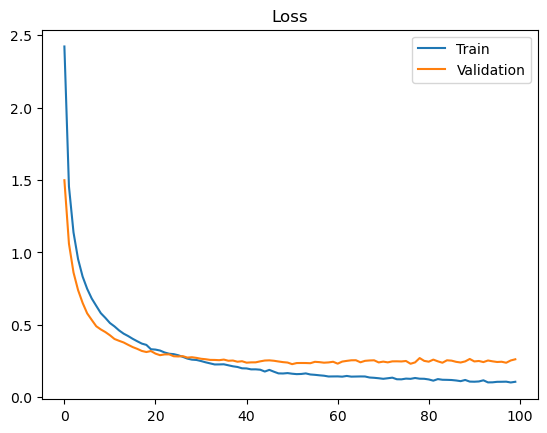

In [19]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

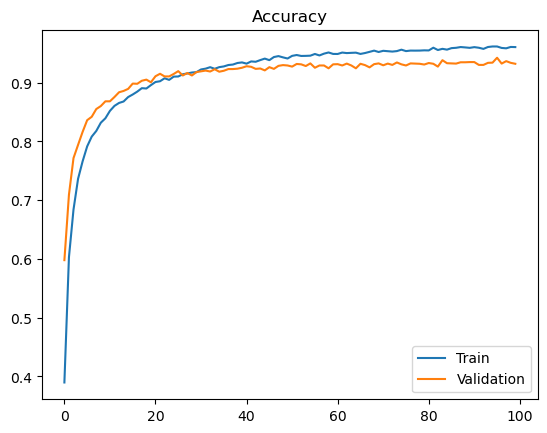

In [20]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [21]:
test_loss, test_acc = model.evaluate(X_val, y_val, batch_size = 128)
print("The test loss is: ", test_loss)
print("The test accuracy is: ", test_acc*100)

25/25 [==============================] - 0s 1ms/step - loss: 0.2617 - accuracy: 0.9322
The test loss is:  0.2617345452308655
The test accuracy is:  93.22414994239807


In [ ]:
# header => for test data, we remove the columns "filename" and "label"
header_test = "filename length chroma_stft_mean chroma_stft_var rms_mean rms_var spectral_centroid_mean spectral_centroid_var spectral_bandwidth_mean \
        spectral_bandwidth_var rolloff_mean rolloff_var zero_crossing_rate_mean zero_crossing_rate_var harmony_mean harmony_var perceptr_mean perceptr_var tempo mfcc1_mean mfcc1_var mfcc2_mean \
        mfcc2_var mfcc3_mean mfcc3_var mfcc4_mean mfcc4_var".split()

In [ ]:
file = open('data_test.csv', 'w', newline = '')
with file:
    writer = csv.writer(file)
    writer.writerow(header_test)

In [ ]:
testdatadir = cwd+'\\test_sounds'
filea = testdatadir+'\\404318__mbari-mars__cachalot-sperm-whale.mp3'
fileb = testdatadir+'\\369510__mbari-mars__blue-whale-d-calls-audible-only-with-appropriate-speakers.mp3'
filec = testdatadir+'\\343682__mbari-mars__blue-whale-b-call-5x.mp3'
filed = testdatadir+'\\404314__mbari-mars__marine-mammal-community.mp3'

outputa = testdatadir+'\\404318__mbari-mars__cachalot-sperm-whale.wav'
outputb = testdatadir+'\\369510__mbari-mars__blue-whale-d-calls-audible-only-with-appropriate-speakers.wav'
outputc = testdatadir+'\\343682__mbari-mars__blue-whale-b-call-5x.wav'
outputd = testdatadir+'\\404314__mbari-mars__marine-mammal-community.wav'

sounda = AudioSegment.from_mp3(filea)
sounda.export(outputa,format='wav')
soundb = AudioSegment.from_mp3(fileb)
soundb.export(outputb,format='wav')
soundc = AudioSegment.from_mp3(filec)
soundc.export(outputc,format='wav')
soundd = AudioSegment.from_mp3(filed)
soundd.export(outputd,format='wav')

In [ ]:
testdatadir = cwd+'\\test_sounds'
for soundfile in os.listdir(testdatadir):
    sound = f"{testdatadir}/{soundfile}"
    y, sr = librosa.load(sound, mono = True, duration = 30)
    chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
    rmse = librosa.feature.rms(y = y)
    spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
    spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
    rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y = y, sr = sr)
    to_append = f'{soundfile} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'

    for e in mfcc:
        to_append += f' {np.mean(e)}'

    file = open('data_test.csv', 'a', newline = '')

    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [22]:
df_test = pd.read_csv('data_test.csv')
df_test.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var
0,343682__mbari-mars__blue-whale-b-call-5x.wav,0.419712,0.117196,699.903979,1131.125268,1228.050907,0.025892,-264.986847,178.968826,-4.073135,...,0.892430,-1.613376,-3.769681,-2.380181,-2.217324,-1.936854,-3.885749,-3.836361,-3.123222,-3.150139
1,369510__mbari-mars__blue-whale-d-calls-audible...,0.565260,0.146358,447.052402,1029.836010,660.112675,0.010983,-340.663452,135.553757,43.430962,...,7.780391,6.799496,6.689344,6.204348,5.249785,4.847163,4.452498,4.349149,4.365420,3.703897
2,403844__mbari-mars__blue-whale-a-and-b-calls-a...,0.634365,0.051778,1645.244615,2022.057885,3466.495705,0.083032,-496.438385,59.393963,30.970032,...,11.780956,10.653441,9.847236,9.865116,8.751871,8.135290,6.796743,6.292011,4.505236,3.566842
3,404313__mbari-mars__pacific-white-sided-dolphi...,0.654535,0.046460,3055.995933,2902.105525,6644.218157,0.132221,-173.227707,61.256779,5.824319,...,-5.228232,9.865984,-3.660115,11.361552,-3.971017,9.370795,-4.223608,8.319797,-4.274014,8.587126
4,404314__mbari-mars__marine-mammal-community.wav,0.622615,0.148608,1974.945068,2609.428054,4974.632291,0.051966,-121.429115,89.296623,9.534516,...,-0.469207,11.797498,1.480802,12.925034,-2.329787,8.949395,-4.391397,4.869825,-5.908479,4.043223


In [23]:
X_test = scaler.transform(np.array(df_test.iloc[:, 1:27]))
print("X_test:", X_test)

X_test: [[-0.84069788  2.38850961 -1.62379658 -1.51132859 -1.86912197 -1.15952666
   0.29028287  1.49708379  0.39632944  0.24793476  0.80107209  0.14802445
   0.93809732 -0.59271319  0.79331877 -1.08240408  0.59466332 -1.35202289
  -0.04376803 -1.18744313  0.16309541 -1.16475099 -0.00583045 -1.87586596
   0.39544946 -1.7758598 ]
 [ 0.17563878  3.20732931 -1.78766538 -1.63396175 -2.09257556 -1.26026205
  -0.32310428  0.99379128  1.38915535  0.06683382  1.1078588   0.17287777
   0.71132542  0.01721851  1.06104429 -0.2327231   1.33987993 -0.30035718
   1.37199195 -0.100665    1.26413937 -0.22995218  1.61248313 -0.40215229
   1.94890766 -0.54729996]
 [ 0.65818855  0.55168226 -1.01113738 -0.4326567  -0.98841256 -0.77345346
  -1.58571829  0.11090305  1.12872446  0.20080251  1.06066946  0.3550493
   1.09716531  0.45016712  1.59210823  0.37305648  1.77270582  0.18141192
   1.79945206  0.3627783   1.78053077  0.22313304  2.06746166 -0.05236062
   1.97791132 -0.5718667 ]
 [ 0.79902946  0.4023504

In [24]:
# generate predictions for samples
predictions = model.predict(X_test)
print(predictions)

[[3.98459310e-09 1.02443511e-04 1.29341430e-07 5.83745589e-07
  4.34467962e-10 5.36930334e-10 6.50092770e-05 1.08570952e-09
  1.43820416e-05 1.05139816e-05 7.11219839e-09 4.33619643e-05
  1.16797197e-11 1.53645851e-05 1.24228191e-05 3.80806187e-09
  1.70493522e-10 1.89060145e-08 1.30584385e-06 9.49931405e-08
  3.64125878e-14 1.01237551e-04 3.76196141e-08 2.99723872e-08
  1.45421550e-01 8.00869301e-11 8.39302518e-14 3.95094247e-07
  2.66211686e-07 3.08646065e-07 2.07710782e-09 9.29833899e-09
  1.37015286e-06 1.25850633e-07 9.89660202e-06 8.52622807e-01
  7.01668945e-10 1.76612275e-06 5.67115350e-08 2.06616878e-05
  8.00369580e-12 1.16869784e-12 1.00361490e-10 1.40355236e-03
  1.98640964e-06 1.41930870e-10 2.19341123e-09 1.79970794e-08
  3.65470942e-06 7.43478022e-12 1.44523205e-04 5.83167683e-08
  8.91236596e-08 1.12902017e-08 6.56457377e-09]
 [1.23050972e-06 9.16370391e-06 3.08845010e-05 1.15176372e-05
  4.21830535e-08 1.17388332e-09 4.55518347e-07 1.26574321e-07
  6.44211468e-07 3.702

In [25]:
# generate argmax for predictions
classes = np.argmax(predictions, axis = 1)
print(classes)

[35 24 13 44 44  2 18]


In [26]:
# transform classes number into classes name
result = encoder.inverse_transform(classes)
print(result)

['NorthernRightWhale' 'HumpbackWhale' 'Fin_FinbackWhale' 'SpermWhale'
 'SpermWhale' 'Beluga_WhiteWhale' 'GrayWhale']


In [17]:
import pickle
output = open('mammal_encoder.pkl','wb')
pickle.dump(encoder, output)
output.close()

In [18]:
np.save('mammal_class.npy',encoder.classes_)

In [27]:
modeldir = cwd+'\\model'
model.save(f'{modeldir}/marine_mammal_cnn/my_model')
model.save(f'{modeldir}/marine_mammal_cnn/marine_model.h5')

INFO:tensorflow:Assets written to: C:\Users\puter\Desktop\msds434_project\model/marine_mammal_cnn/my_model\assets


In [ ]:
savedmodel = modeldir+'\\marine_mammal_cnn'
model = tf.keras.models.load_model(savedmodel)
model.summary()
#model.save(f'{modeldir}/marine_mammal_cnn/marine_model.h5')

In [29]:
new_model = tf.keras.models.load_model(f'{modeldir}/marine_mammal_cnn/marine_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               13824     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [30]:
predictions = new_model.predict(X_test)
print(predictions)

[[3.98459310e-09 1.02443511e-04 1.29341430e-07 5.83745589e-07
  4.34467962e-10 5.36930334e-10 6.50092770e-05 1.08570952e-09
  1.43820416e-05 1.05139816e-05 7.11219839e-09 4.33619643e-05
  1.16797197e-11 1.53645851e-05 1.24228191e-05 3.80806187e-09
  1.70493522e-10 1.89060145e-08 1.30584385e-06 9.49931405e-08
  3.64125878e-14 1.01237551e-04 3.76196141e-08 2.99723872e-08
  1.45421550e-01 8.00869301e-11 8.39302518e-14 3.95094247e-07
  2.66211686e-07 3.08646065e-07 2.07710782e-09 9.29833899e-09
  1.37015286e-06 1.25850633e-07 9.89660202e-06 8.52622807e-01
  7.01668945e-10 1.76612275e-06 5.67115350e-08 2.06616878e-05
  8.00369580e-12 1.16869784e-12 1.00361490e-10 1.40355236e-03
  1.98640964e-06 1.41930870e-10 2.19341123e-09 1.79970794e-08
  3.65470942e-06 7.43478022e-12 1.44523205e-04 5.83167683e-08
  8.91236596e-08 1.12902017e-08 6.56457377e-09]
 [1.23050972e-06 9.16370391e-06 3.08845010e-05 1.15176372e-05
  4.21830535e-08 1.17388332e-09 4.55518347e-07 1.26574321e-07
  6.44211468e-07 3.702

In [ ]:
df_test = pd.read_csv('data_test_for_demo.csv')

In [ ]:
import csv
import json
 
 
# Function to convert a CSV to JSON
# Takes the file paths as arguments
def make_json(csvFilePath, jsonFilePath):
     
    # create a dictionary
    data = {}
     
    # Open a csv reader called DictReader
    with open(csvFilePath, encoding='utf-8') as csvf:
        csvReader = csv.DictReader(csvf)
         
        # Convert each row into a dictionary
        # and add it to data
        for rows in csvReader:
             
            # Assuming a column named 'No' to
            # be the primary key
            key = rows['filename']
            data[key] = rows
 
    # Open a json writer, and use the json.dumps()
    # function to dump data
    with open(jsonFilePath, 'w', encoding='utf-8') as jsonf:
        jsonf.write(json.dumps(data, indent=4))
         
# Driver Code
 
# Decide the two file paths according to your
# computer system
csvFilePath = r'data_test_for_demo_sperm_whale.csv'
jsonFilePath = r'data_test_for_demo_sperm_whale.json'
 
# Call the make_json function
make_json(csvFilePath, jsonFilePath)